In [1]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt 
image_path = r"../dip_Images/"

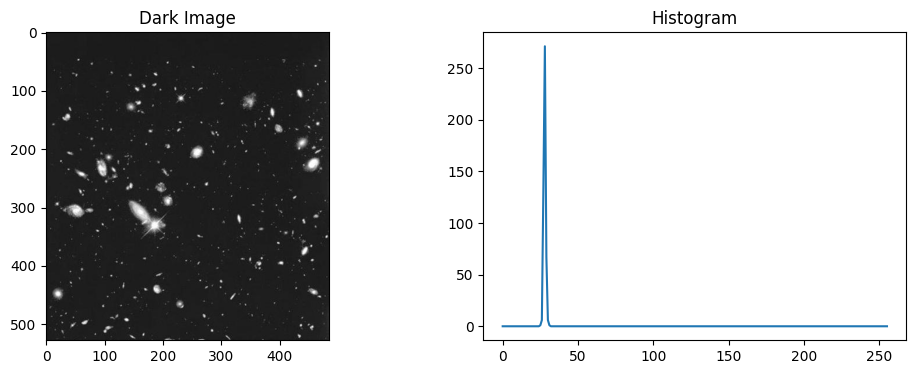

In [13]:
dark = cv2.imread(image_path+"Fig0334(a)(hubble-original).tif",0)
dark_hist = cv2.calcHist(dark,channels=[0],mask=None,histSize=[256],ranges = [0,256])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.imshow(dark, cmap='gray')
ax1.set_title('Dark Image')

ax2.plot(dark_hist)
ax2.set_title('Histogram')
plt.show()

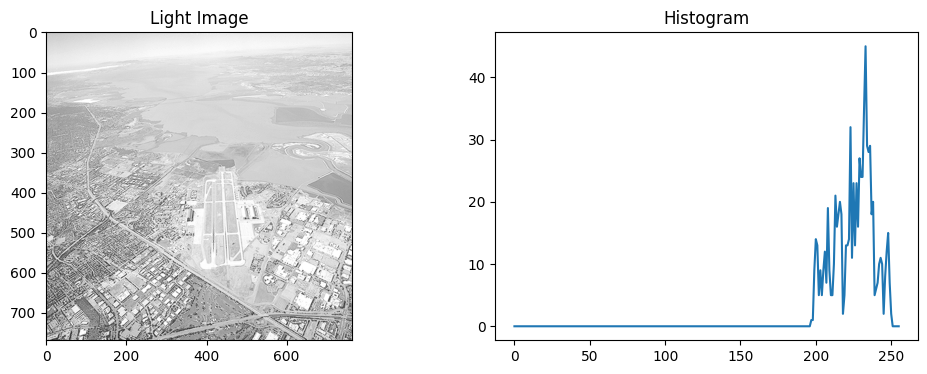

In [16]:
light = cv2.imread(image_path+"Fig0309(a)(washed_out_aerial_image).tif",0)
light_hist = cv2.calcHist(light,channels=[0],mask=None,histSize=[256],ranges = [0,256])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.imshow(light, cmap='gray')
ax1.set_title('Light Image')

ax2.plot(light_hist)
ax2.set_title('Histogram')
plt.show()

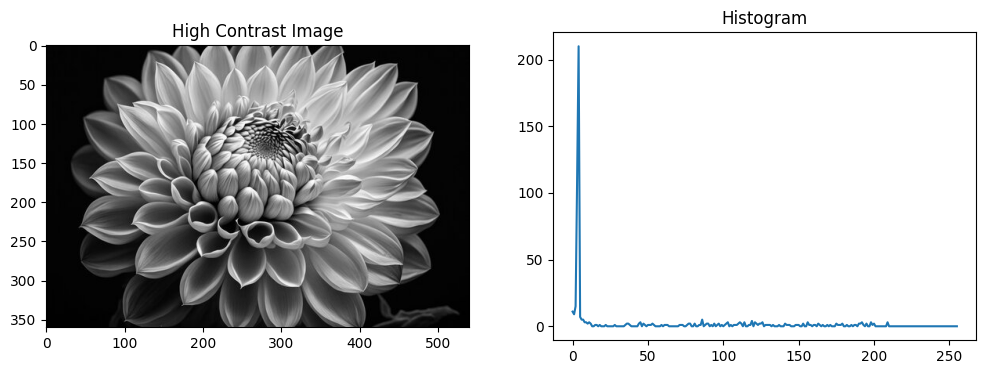

In [20]:
high_contrast = cv2.imread(image_path+"high_contrast.jpg",0)
high_contrast_hist = cv2.calcHist(high_contrast,channels=[0],mask=None,histSize=[256],ranges = [0,256])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.imshow(high_contrast, cmap='gray')
ax1.set_title('High Contrast Image')

ax2.plot(high_contrast_hist)
ax2.set_title('Histogram')
plt.show()

In [23]:
def hist_equalise(image):
    pdf = cv2.calcHist(image,channels=[0],mask=None,histSize=[256],ranges = [0,256])
    pdf /= pdf.sum()
    cdf = np.cumsum(pdf)
    new_vals = cdf*255
    new_vals = new_vals.astype(np.uint8)
    val_dict = dict()

    for i in range(256):
        val_dict[np.uint8(i)]=new_vals[i]
    dims = image.shape
    new_img = image.copy()
    for i in range(dims[0]):
        for j in range(dims[1]):
            new_img[i][j] = val_dict[image[i][j]]
    return new_img


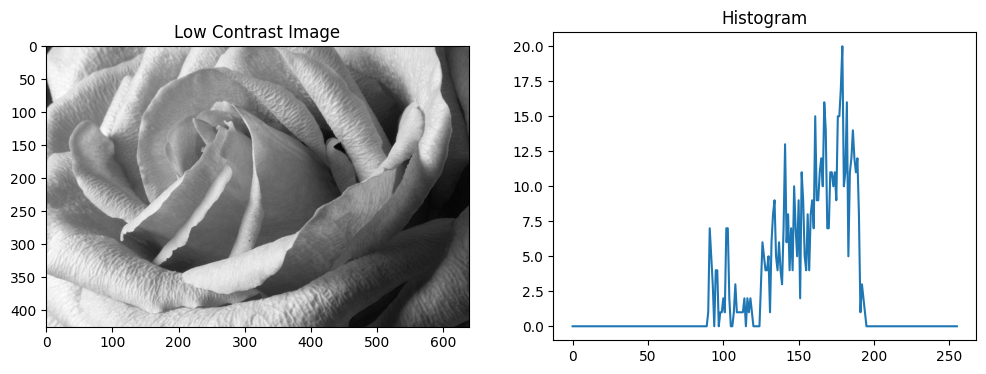

In [27]:
low_contrast = cv2.imread("low-contrast-ex05.jpg",0)
old_hist = cv2.calcHist(low_contrast,channels=[0],mask=None,histSize=[256],ranges = [0,256])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.imshow(low_contrast, cmap='gray')
ax1.set_title('Low Contrast Image')

ax2.plot(old_hist)
ax2.set_title('Histogram')
plt.show()

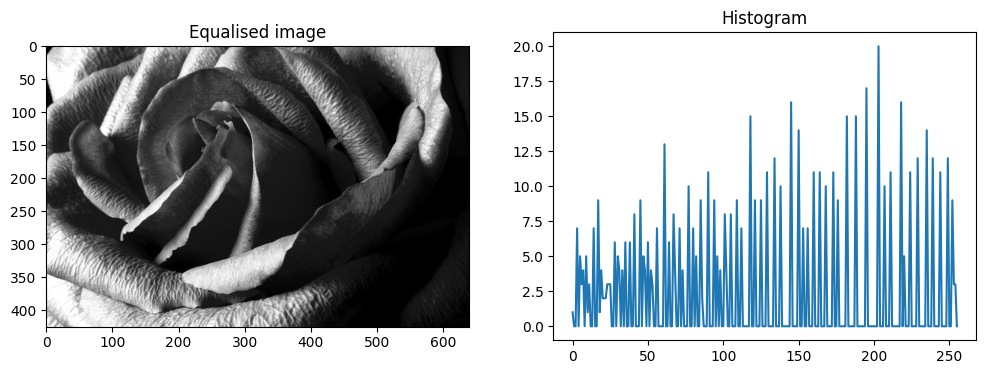

In [28]:
image = low_contrast
new_img = hist_equalise(image)
new_hist = cv2.calcHist(new_img,channels=[0],mask=None,histSize=[256],ranges = [0,256])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.imshow(new_img, cmap='gray')
ax1.set_title('Equalised image')

ax2.plot(new_hist)
ax2.set_title('Histogram')
plt.show()